# Single Features

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('/kaggle/input/cern-electron-collision-data/dielectron.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [3]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


# Create Model

In [4]:
anomaly_inputs = ['E1', 'E2']

In [5]:
model_IF = IsolationForest(contamination = 0.1, random_state = 42)

In [6]:
model_IF.fit(df[anomaly_inputs])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [7]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

In [8]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [9]:
df

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,px2,py2,pz2,pt2,eta2,phi2,Q2,M,anomaly_scores,anomaly
0,147115,366639895,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,...,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841,0.104747,1
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,...,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300,0.114130,1
2,147115,367112316,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,...,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770,0.125661,1
3,147115,366952149,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,...,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862,0.092649,1
4,147115,366523212,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,...,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718,0.104398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,...,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779,0.070491,1
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,...,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540,0.129298,1
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,...,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350,0.101087,1
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,...,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670,0.109768,1


In [10]:
df.loc[:, ['E1', 'E2', 'anomaly', 'anomaly_scores']]

,E1,E2,anomaly,anomaly_scores
0,58.71410,11.28360,1,0.104747
1,6.61188,17.14920,1,0.114130
2,25.54190,15.82030,1,0.125661
3,65.39590,25.12730,1,0.092649
4,61.45040,13.88710,1,0.104398
...,...,...,...,...
99995,12.31310,1.80181,1,0.070491
99996,18.46420,14.69110,1,0.129298
99997,4.18566,72.81740,1,0.101087
99998,54.46220,8.58671,1,0.109768


In [11]:
def outlier_plot (data, outlier_method_name, x_var, y_var):
        
        print(f'Outlier Method: {outlier_method_name}')
        
        method = f'{outlier_method_name}_anomaly'
        
        print(f"number of anomalous values {len(data[data['anomaly'] == -1])}")
        print(f"number of non-anomalous values {len(data[data['anomaly'] == 1])}")
        print(f"number of values {len(data)}")
        
        g = sns.FacetGrid(data, col = 'anomaly', height = 4, hue = 'anomaly', hue_order = [1, -1])
        g.map(sns.scatterplot, x_var, y_var)
        g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y = 1.10, fontweight = 'bold')
        axes = g.axes.flatten()
        axes[0].set_title(f"Outliers \n {len(data[data['anomaly'] == -1])} points")
        axes[1].set_title(f"Outliers \n {len(data[data['anomaly'] == 1])} points")
        
        return g

Outlier Method: Isolation Forest
number of anomalous values 10000
number of non-anomalous values 90000
number of values 100000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


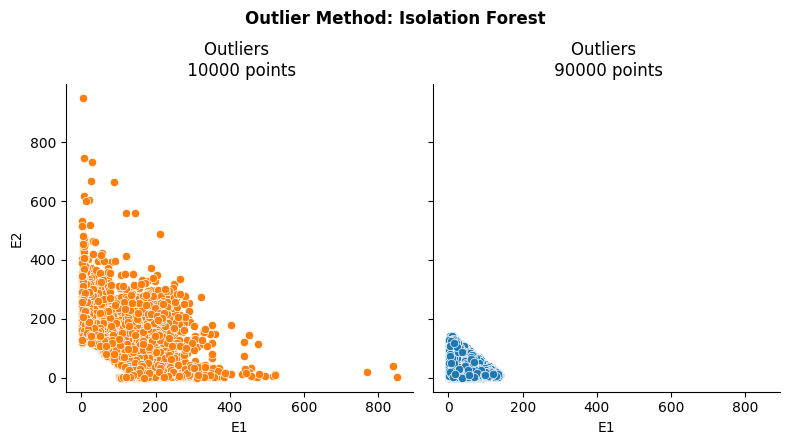

In [12]:
outlier_plot(df, "Isolation Forest", "E1", "E2")

# Multiple Inputs

In [16]:
anomaly_inputs = ['E1','px1','py1','pz1','pt1','E2','px2','py2','pz2','pt2']

In [17]:
model_IF = IsolationForest(contamination = 0.1, random_state = 42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

KeyError: "['px1'] not in index"

Outlier Method: Autoencoder
number of anomalous values 10000
number of non-anomalous values 90000
number of values 100000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


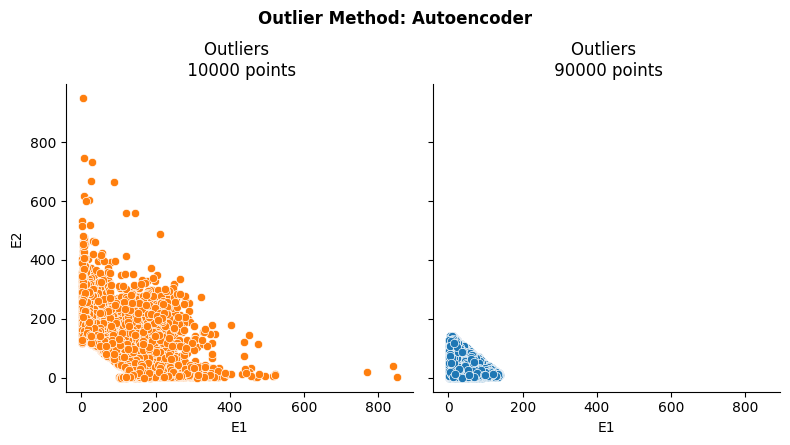

In [18]:
outlier_plot(df, "Autoencoder", "E1", "E2")

KeyError: 'px1'

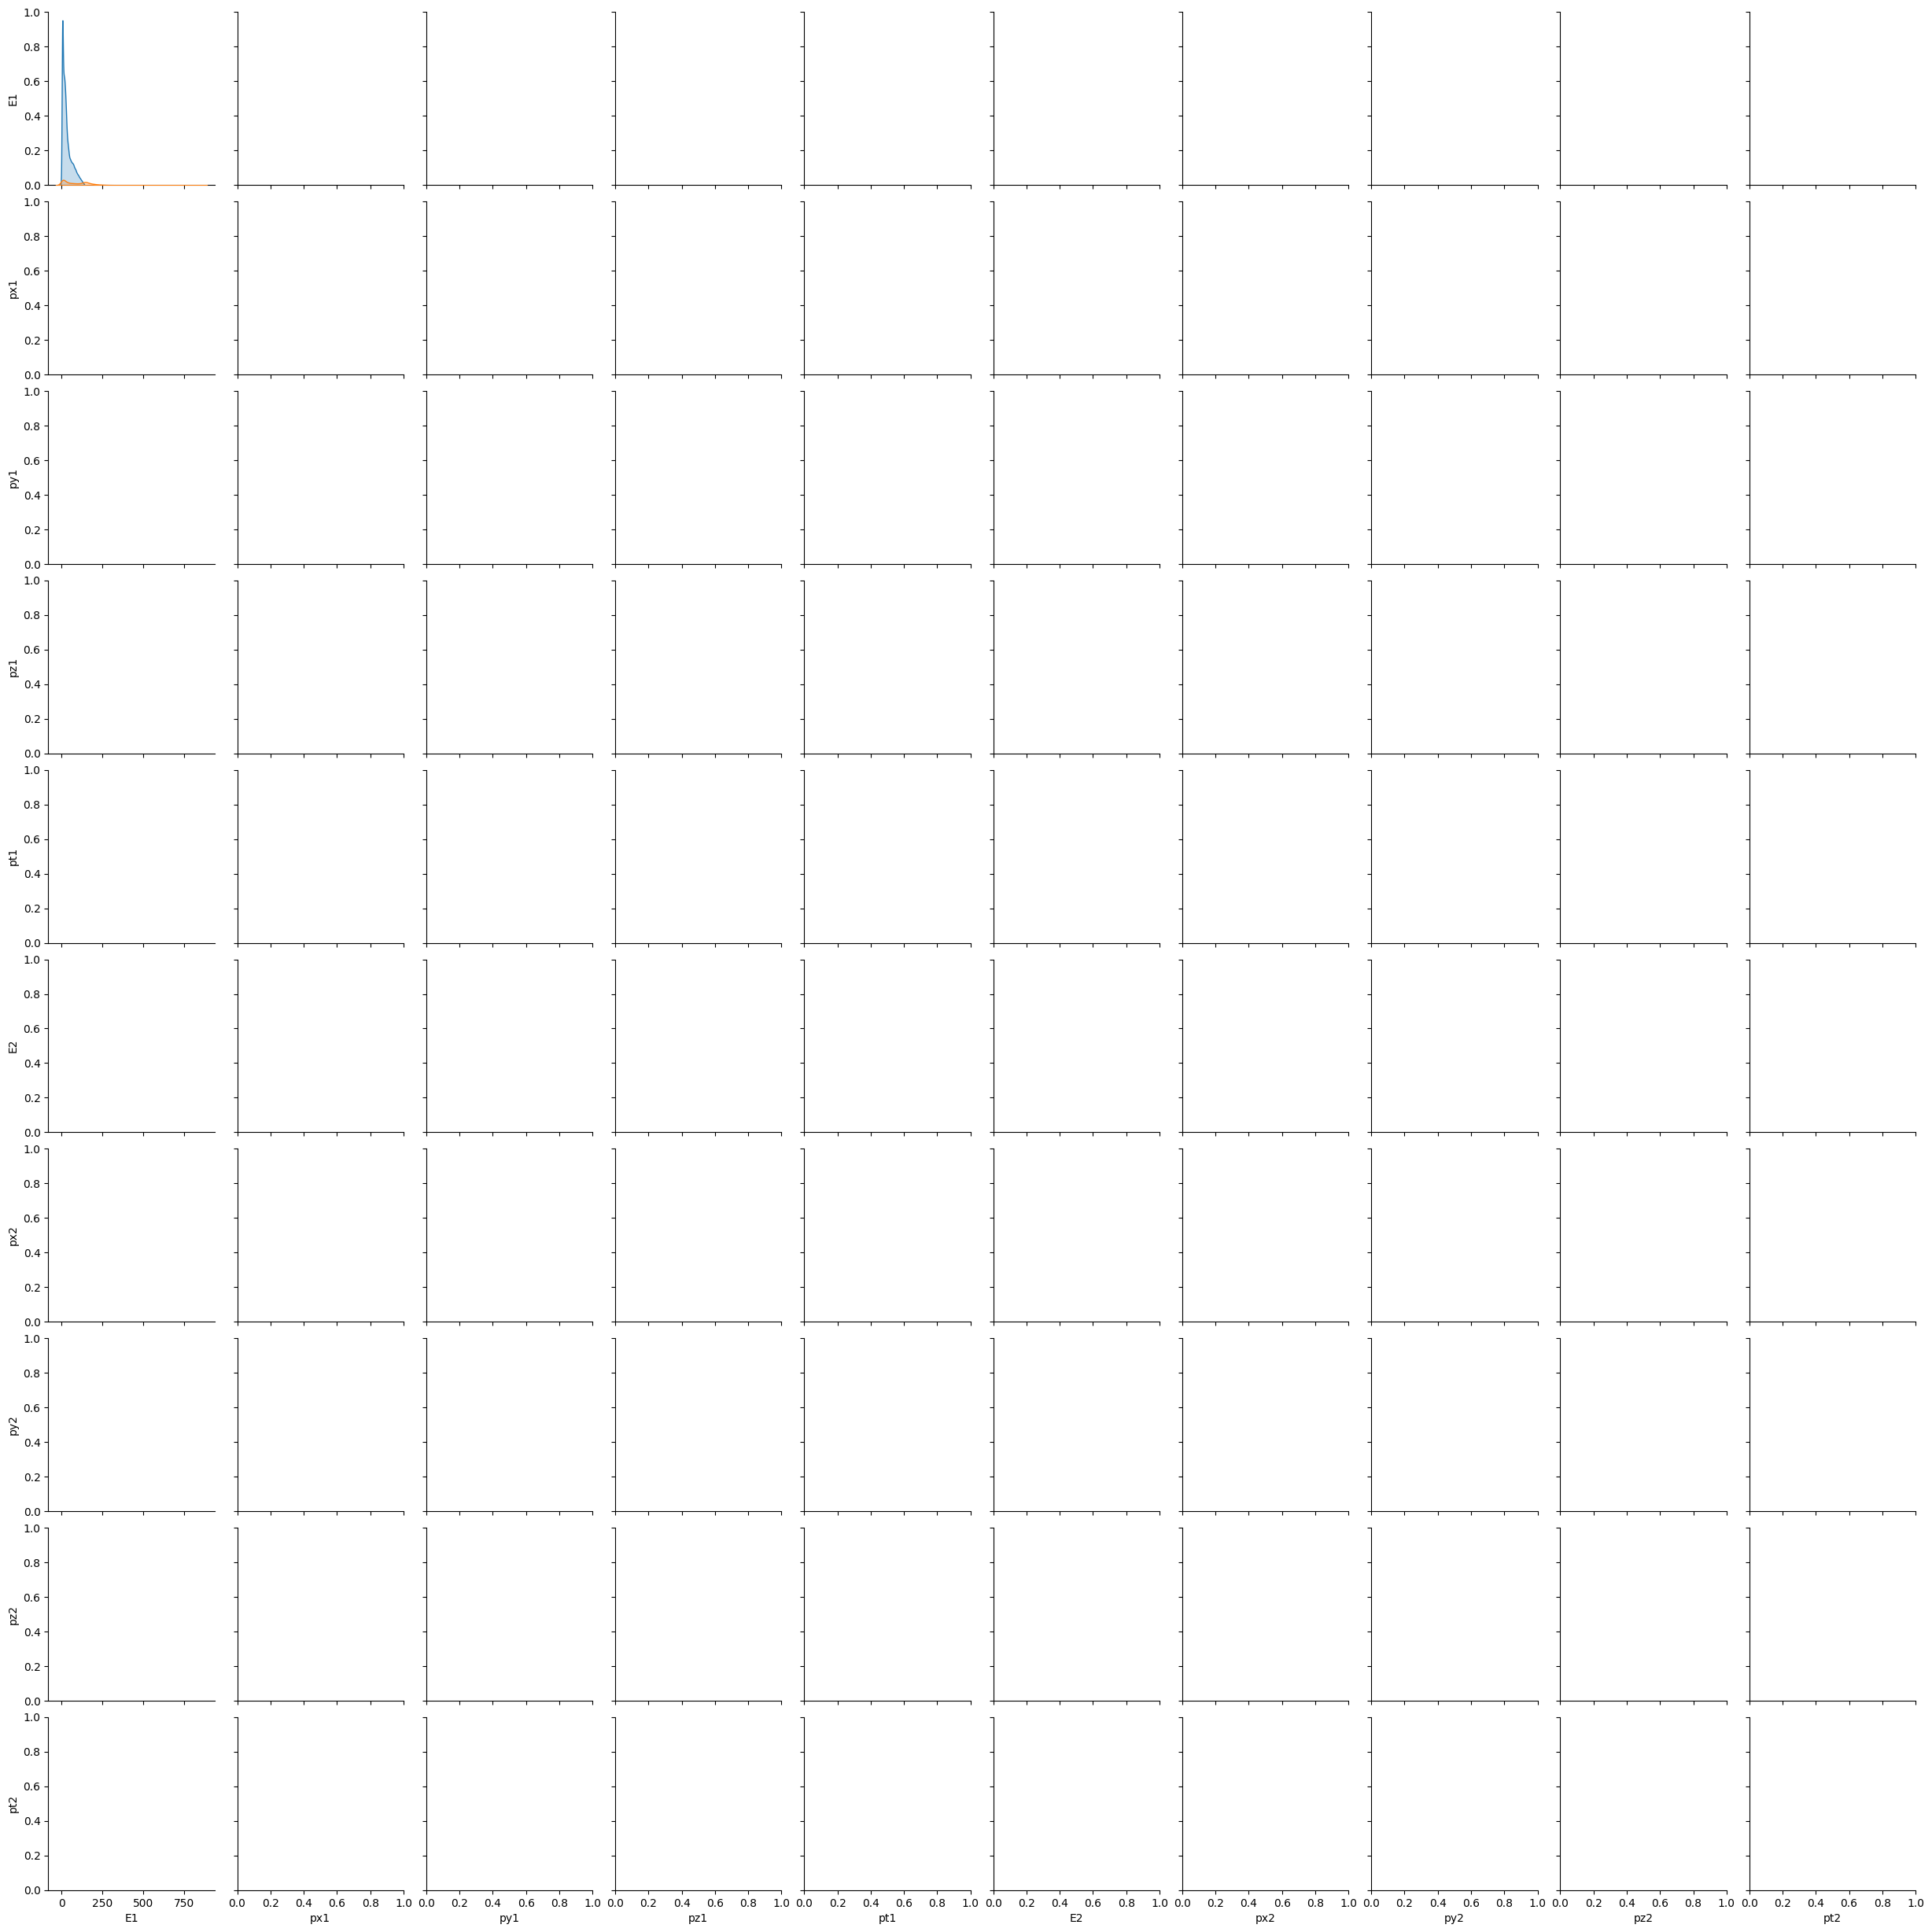

In [20]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars = anomaly_inputs, hue = 'anomaly', palette = palette)